In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color: pink; padding: 10px">

In the realm of credit card services, Customer Churn, often denoted as the Churn Rate or simply 'Churn', represents the proportion of customers who discontinue using a company's credit card products within a defined timeframe. Conceptually, the Churn Rate signifies the percentage of customers a company 'loses' over a specified period, and is occasionally termed the 'Attrition Rate'. <br>
<br>
My thought process goes like this:<br>

--Which groups are our most valuable customers? What are their backgrounds, and how satisfied are they with our service?<br>
    
--What's the churn rate between our customer groups?<br>   
    
With this understanding, let's delve into a dataset of credit card customers to analyze the churn rate and discern potential correlations between churn rate and customer behavior.
<div>

<H1>Data Exploration and Upload

In [2]:
#import dataset
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
#look at the data
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
#look at shape of the data 

df.shape

#100000 rows & 18 columns

(10000, 18)

In [5]:
#Summary information about the dataframe
df.info()

#most columns are numeric data, let's work with df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
# summary information on the numeric columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
# summary information on the non-numeric columns

df.describe(include='object') 

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [9]:
# Checking for the number of unique values in each column

for col in df.columns:
    unique_count = df[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

RowNumber has 10000 unique values
CustomerId has 10000 unique values
Surname has 2932 unique values
CreditScore has 460 unique values
Geography has 3 unique values
Gender has 2 unique values
Age has 70 unique values
Tenure has 11 unique values
Balance has 6382 unique values
NumOfProducts has 4 unique values
HasCrCard has 2 unique values
IsActiveMember has 2 unique values
EstimatedSalary has 9999 unique values
Exited has 2 unique values
Complain has 2 unique values
Satisfaction Score has 5 unique values
Card Type has 4 unique values
Point Earned has 785 unique values


<H1>Data Cleaning

In [10]:
#check missing values and sum of unique values
def data_overview():
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    print('Missing Value number : ' , df.isnull().sum().values.sum()) 
    print('\nUnique values' , df.nunique())
data_overview()

#no missing value

Rows :   10000
Columns:   18
Missing Value number :  0

Unique values RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64


In [11]:
df.count()

RowNumber             10000
CustomerId            10000
Surname               10000
CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

<div style="background-color: pink; padding: 10px">

**Now we know:<br>**

1. We have 10,000 customers, with more males than females.<br>
2. All the customers are from three countries, mostly from France.<br>
3. The average credit score is 650.5.<br>
4. The age distribution spans 70 years, with an average age of 38.9.<br>
5. The average balance is 76,485.8, and the average estimated salary is 100,090.2.<br>
6. The average tenure is five months.<br>
7. There are four card types, Diamond cards are the most common card type, and each customer has an average of 0.7 credit cards.<br>
8. Each customer has used an average of 1.5 products, and over half of them are active members.<br>
9. The average satisfaction score is 3.
</div>

<H1>Churn Rate Analysis

<H2>What's the Churn Rate overall?

Churn rate: 20.38%


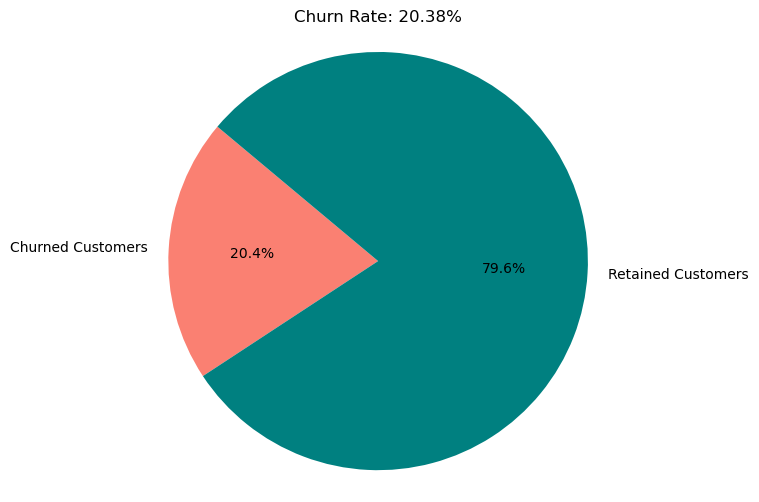

In [12]:
# Count the number of customers who churned (Exited = 1)
churned_count = (df['Exited'] == 1).sum()

# Total number of customers
total_customers = df.shape[0]

# Calculate churn rate
churn_rate = (churned_count / total_customers) * 100

print(f"Churn rate: {churn_rate:.2f}%")

# pie chart data
labels = ['Churned Customers', 'Retained Customers']
sizes = [churned_count, total_customers - churned_count]
colors = ['salmon', 'teal']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title(f'Churn Rate: {churn_rate:.2f}%')
plt.axis('equal') 

# Display pie chart
plt.show()

<H2> Churn Rate By Gender

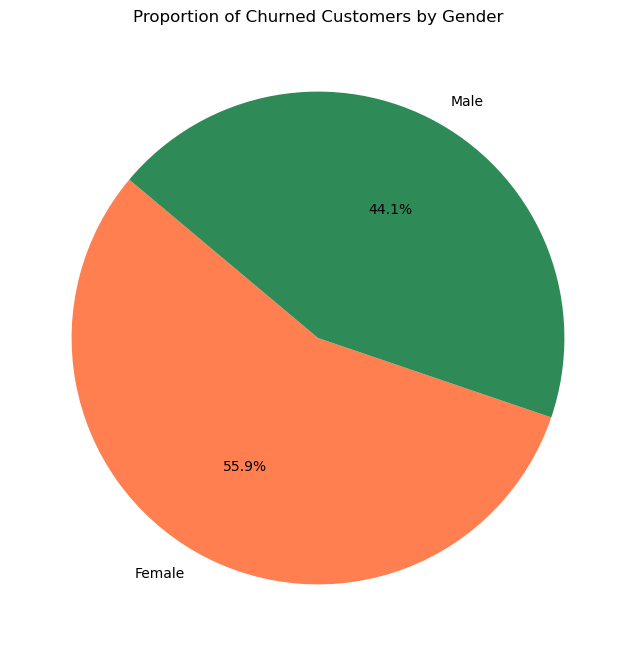

In [13]:
# Count the number of churned customers by gender
churn_count_by_gender = df[df['Exited'] == 1]['Gender'].value_counts()

# Define a custom color palette
custom_palette = ["coral", "seagreen"]

# Create a pie chart for the churned customers
plt.figure(figsize=(8, 8))
plt.pie(churn_count_by_gender, labels=churn_count_by_gender.index, colors=custom_palette, 
        autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Proportion of Churned Customers by Gender')

# Show the plot
plt.show()

In [14]:
#churn_count_by_gender = df[df['Exited'] == 1]['Gender'].value_counts()
#churn_count_by_gender

<H2>Churn Rate By Age

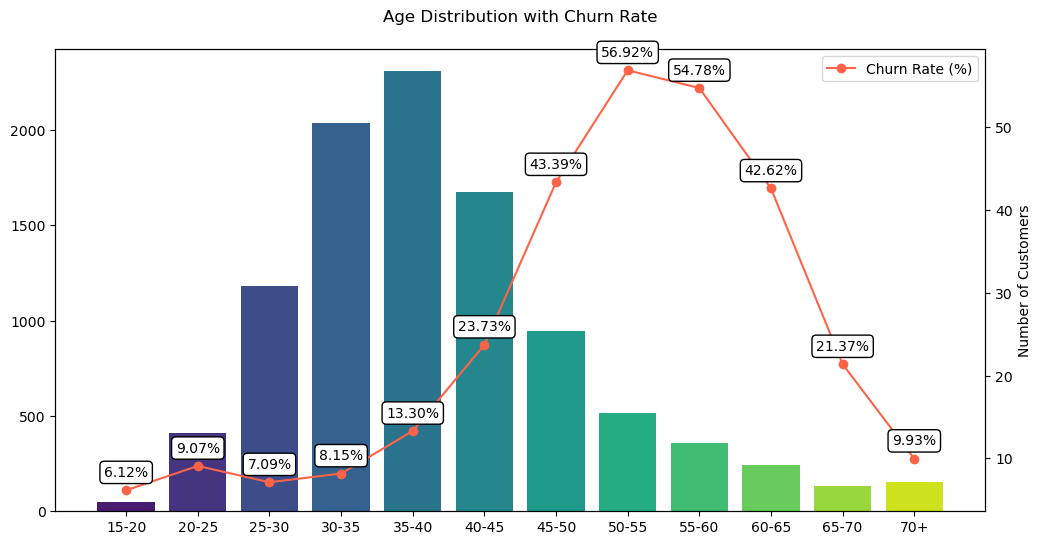

In [15]:
# Define age bins and labels
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70+']

# Create age groups based on the bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels, right=False)

# Calculate churn rate for each age group
churn_by_age = df.groupby('Age_Group')['Exited'].mean() * 100
churn_by_age.index = labels

# Plot age distribution with spacing between bars
plt.figure(figsize=(12, 6))

# Create a color palette from viridis
palette = sns.color_palette("viridis", len(labels))

# Plot the histogram manually to set colors and spacing
bar_width = 0.8  # Width of the bars, reduced for spacing
for i, label in enumerate(labels):
    age_group_count = df[df['Age_Group'] == label].shape[0]
    plt.bar(i, age_group_count, width=bar_width, color=palette[i])

# Set x-ticks and labels
plt.xticks(np.arange(len(labels)), labels)

# Create the secondary y-axis for the churn rate
ax2 = plt.gca().twinx()
ax2.plot(churn_by_age.index, churn_by_age.values, marker='o', color='tomato', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)')

# Annotate churn rate percentages
for i, txt in enumerate(churn_by_age.values):
    ax2.annotate(f'{txt:.2f}%', 
                 (i, txt), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))


# Set labels and title
plt.title('Age Distribution with Churn Rate', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# Show legend for the churn rate
ax2.legend(loc='upper right')

plt.show()


<H2>Customer Number By Country

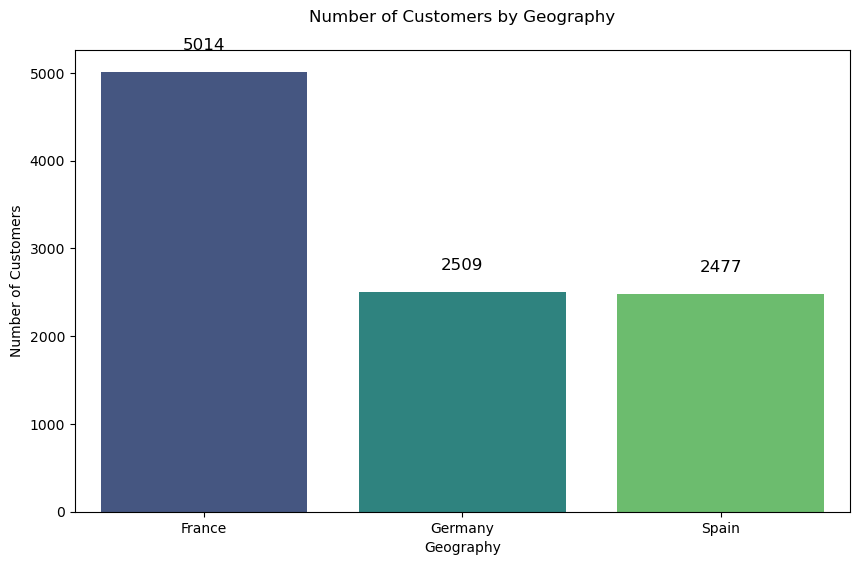

In [16]:
# Calculate the number of customers for each Geography
geography_counts = df['Geography'].value_counts()

# Plot the distribution of Geography
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=geography_counts.index, y=geography_counts.values, palette='viridis')

# Annotate the numbers on the bars
for i, count in enumerate(geography_counts.values):
    ax.text(i, count + 0.05 * max(geography_counts.values), str(count), ha='center', fontsize=12, color='black')

# Set title and labels
plt.title('Number of Customers by Geography', pad=20)
plt.xlabel('Geography')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

<H2> Churn Rate By Country

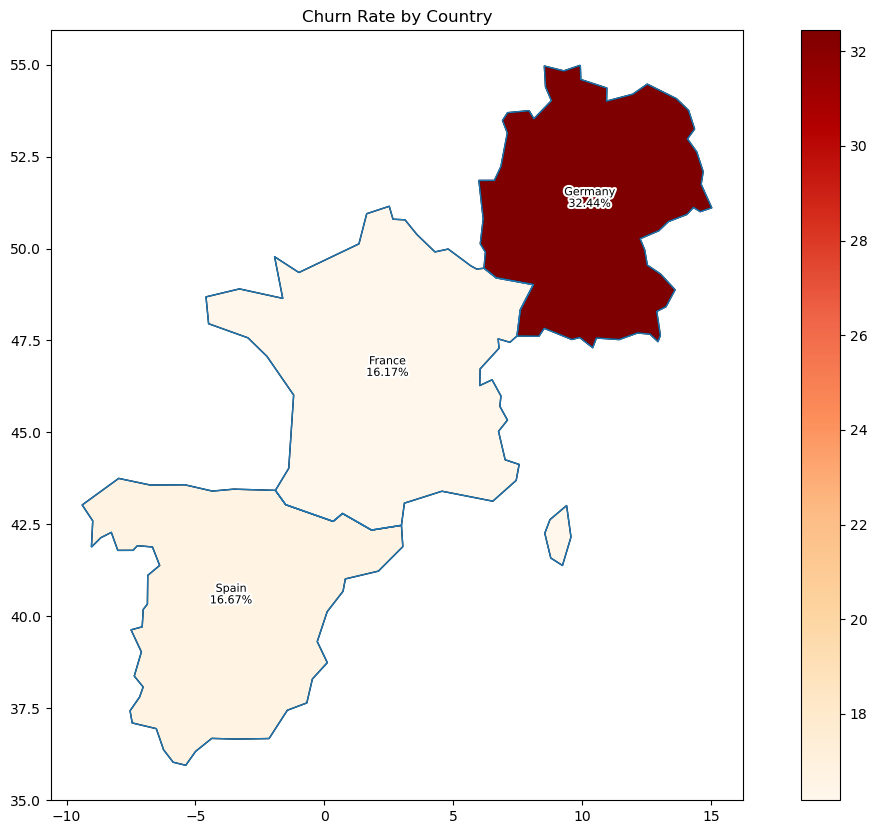

In [17]:
import geopandas as gpd
import matplotlib.patheffects as path_effects

#Calculate churn rate by country
churn_by_country = df.groupby('Geography')['Exited'].mean() * 100

#Load the shapefile
world = gpd.read_file('countries.geo.json')

#Merge the churn rate data with the shapefile
world = world.merge(churn_by_country, left_on='name', right_index=True)

#Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)  # Add borders
world.plot(column='Exited', cmap='OrRd', figsize=(15, 10), legend=True, ax=ax, edgecolor='black')

# Add labels for country names and churn rates
for idx, row in world.iterrows():
    text = plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
                    f'{row["name"]}\n{row["Exited"]:.2f}%', 
                    horizontalalignment='center', fontsize=8, color='black')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                           path_effects.Normal()])

plt.title('Churn Rate by Country')
plt.show()

<H2>Churn Rate By Age Group and Geography

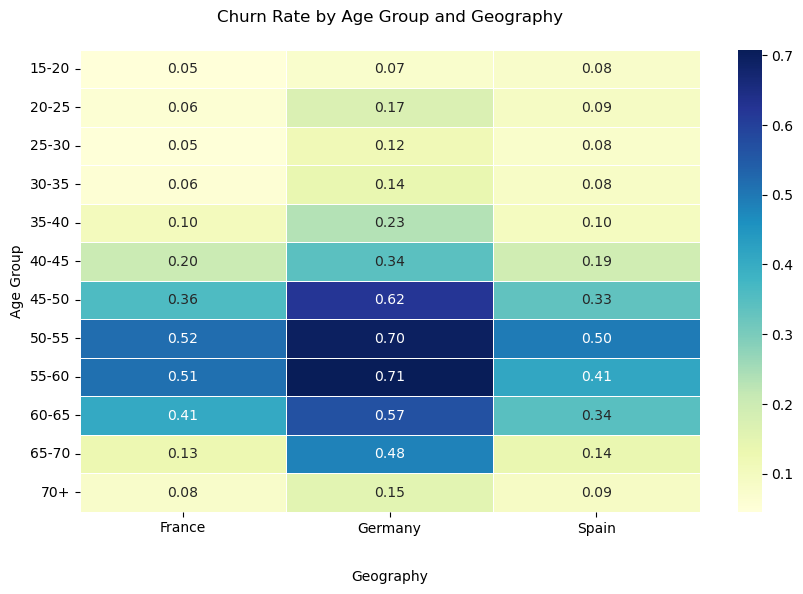

In [18]:
# Group data by age group and geography, and calculate churn rate
churn_rate_data = df.groupby(['Age_Group', 'Geography'])['Exited'].mean().reset_index()

# Create pivot table
pivot_table = churn_rate_data.pivot_table(index='Age_Group', columns='Geography', values='Exited')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Churn Rate by Age Group and Geography', pad=20)
plt.xlabel('Geography', labelpad=25)
plt.ylabel('Age Group')
plt.show()


<H2>Churn Rate By Tenure

**Tenure : Number of months the customer has stayed with the company

In [19]:
df['Tenure'].value_counts().sort_index()


0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

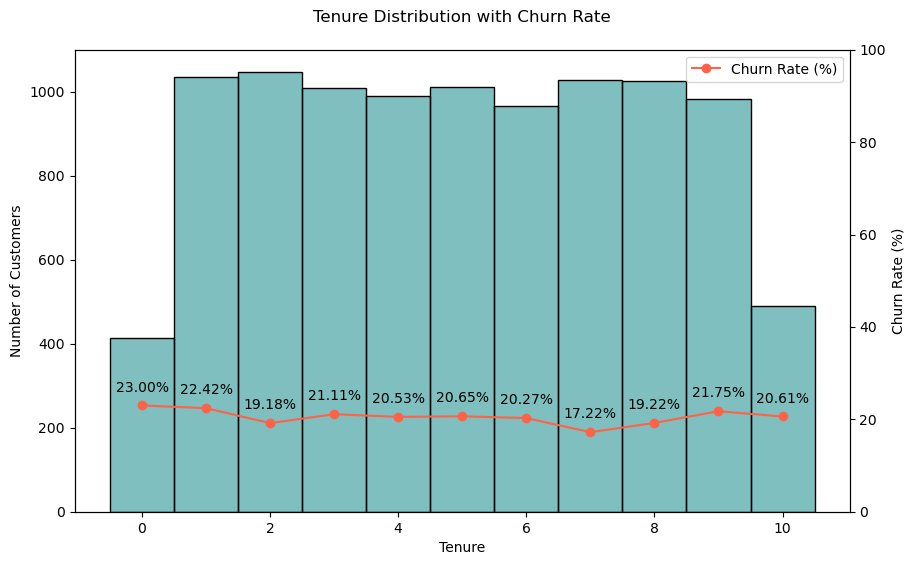

In [20]:
# Define tenure bins
tenure_bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]

# Create tenure groups based on the bins
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=False)

# Calculate churn rate for each tenure group
churn_by_tenure = (df.groupby('Tenure_Group')['Exited'].mean() * 100).fillna(0)  # Fill NaN values with 0

# Plot tenure distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Tenure'], bins=tenure_bins, kde=False, color='teal', alpha=0.5)
ax.set_ylabel('Number of Customers')

# Plot churn rate line
ax2 = ax.twinx()
ax2.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o', color='tomato', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)')
ax2.set_ylim(0, 100)  # Ensure the y-axis limit is from 0% to 100%

for i, txt in enumerate(churn_by_tenure.values):
    ax2.annotate(f'{txt:.2f}%', (churn_by_tenure.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.title('Tenure Distribution with Churn Rate', pad=20)
plt.xlabel('Tenure (Midpoint of Each Bin)', labelpad=20)
plt.ylabel('Churn Rate (%)')
ax.set_ylabel('Number of Customers')

# Show legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()




<H2> Churn Rate By Card Type

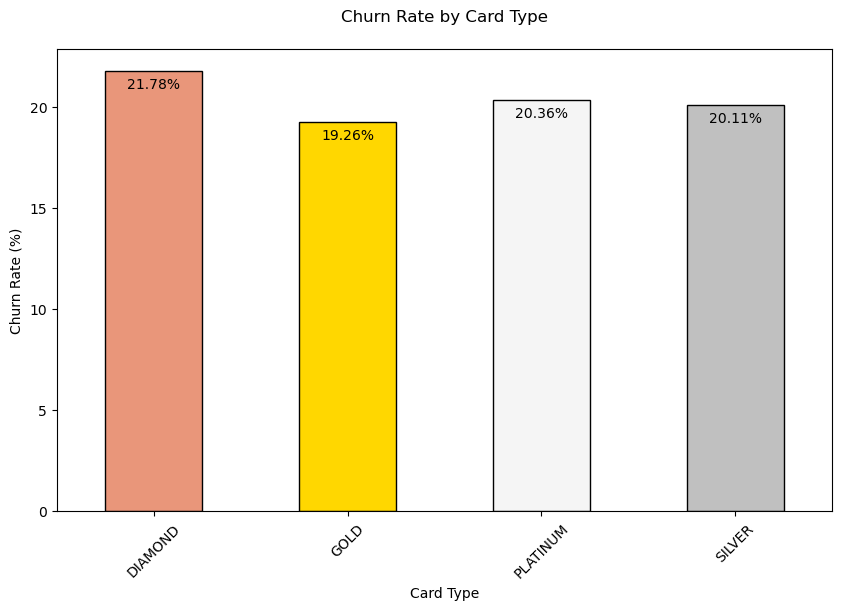

In [21]:
# Calculate the proportion of churned and non-churned customers for each card type
exit_by_card_type = df.groupby(['Card Type', 'Exited']).size().unstack()
exit_by_card_type['Total'] = exit_by_card_type.sum(axis=1)
exit_by_card_type['Churn Rate (%)'] = (exit_by_card_type[1] / exit_by_card_type['Total']) * 100

# Choose colors for different card types
colors = ['darksalmon', 'gold', 'whitesmoke', 'silver']

# Plot the stacked bar chart showing percentages
plt.figure(figsize=(10, 6))
bars = exit_by_card_type['Churn Rate (%)'].plot(kind='bar', color=colors, edgecolor='black')
plt.title('Churn Rate by Card Type', pad=20)
plt.xlabel('Card Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Display percentage labels
for bar in bars.patches:
    value = bar.get_height()
    # Check if the label is outside the plot area
    if value >= bar.get_height():
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 1, f'{value:.2f}%', ha='center', va='bottom')  # Adjust the y-coordinate
    else:
        plt.text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

<H2> The Correlation of 'Exited' With Other Variables

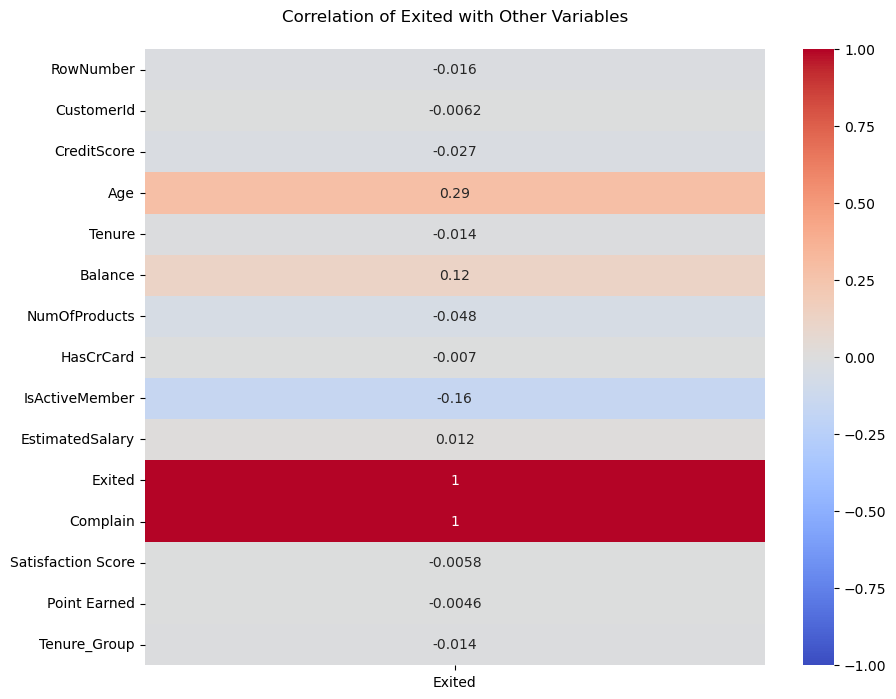

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Select the correlation of 'Exited' with other variables
corr_with_exited = corr_matrix[['Exited']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_exited, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Exited with Other Variables', pad=20)
plt.show()


#Correlation Values:
#The numbers in each cell represent the correlation coefficient between the variables. 

#The value ranges from -1 to 1:
#1: Perfect positive correlation
#0: No correlation
#-1: Perfect negative correlation


<H2>Churn Rate By Complaint Status

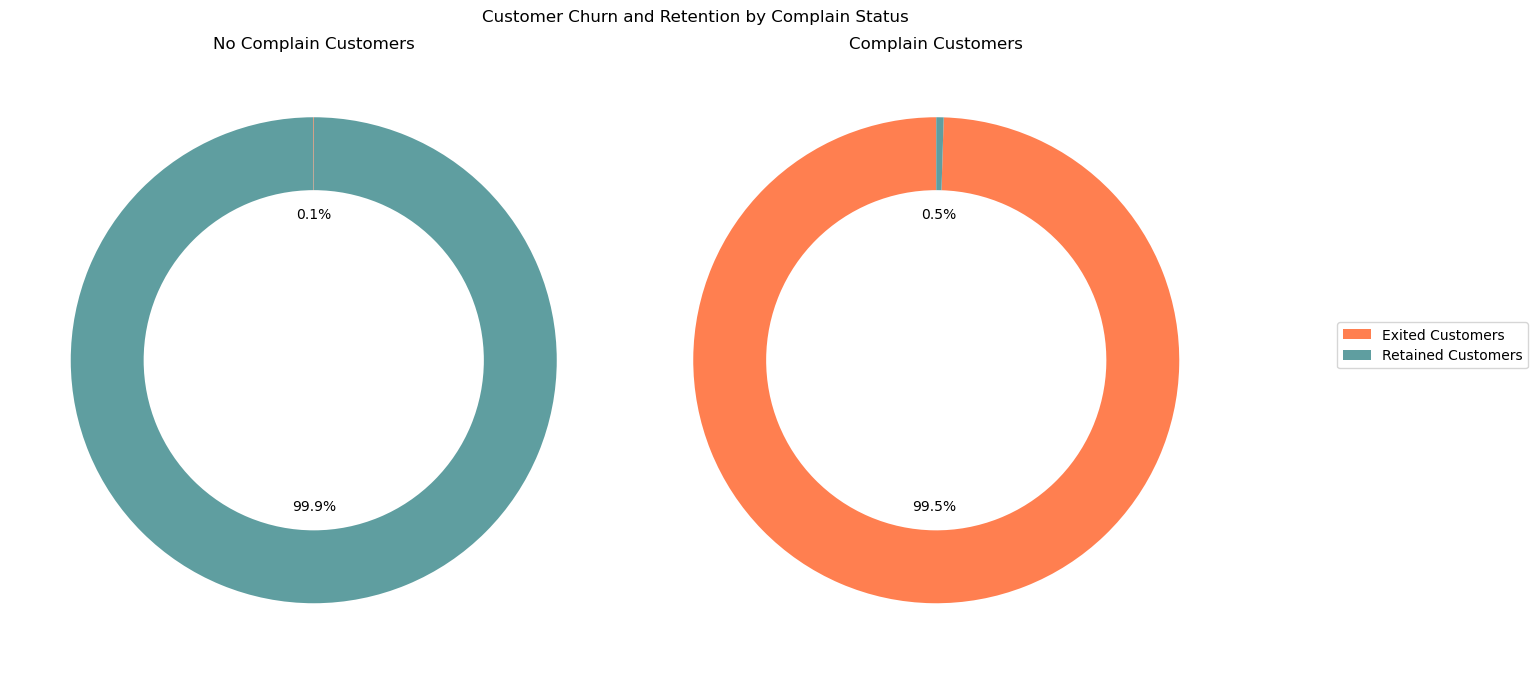

In [23]:
# Calculate the total number of customers for each complaint status
total_customers_by_complain = df['Complain'].value_counts()

# Calculate the number of exited customers for each complaint status
exited_customers_by_complain = df[df['Exited'] == 1]['Complain'].value_counts()

# Create a DataFrame
churn_data = pd.DataFrame({
    'Total Customers': total_customers_by_complain,
    'Exited Customers': exited_customers_by_complain
}).fillna(0)

# Calculate the number of retained customers
churn_data['Retained Customers'] = churn_data['Total Customers'] - churn_data['Exited Customers']

# Ensure the index has correct string labels
churn_data.index = churn_data.index.map({1: 'Complain', 0: 'No Complain'})

# Plot the donut charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

colors = ["coral", "cadetblue"]

for i, (status, row) in enumerate(churn_data.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        [row['Exited Customers'], row['Retained Customers']],
        labels=None,  
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3)
    )
    ax.set_title(f'{status} Customers')
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')

# Add legend
fig.legend(wedges, ['Exited Customers', 'Retained Customers'], loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.suptitle('Customer Churn and Retention by Complain Status')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

<H2>Churn Rate By Satisfaction Score

In [24]:
df['Satisfaction Score'].value_counts().sort_index()


1    1932
2    2014
3    2042
4    2008
5    2004
Name: Satisfaction Score, dtype: int64

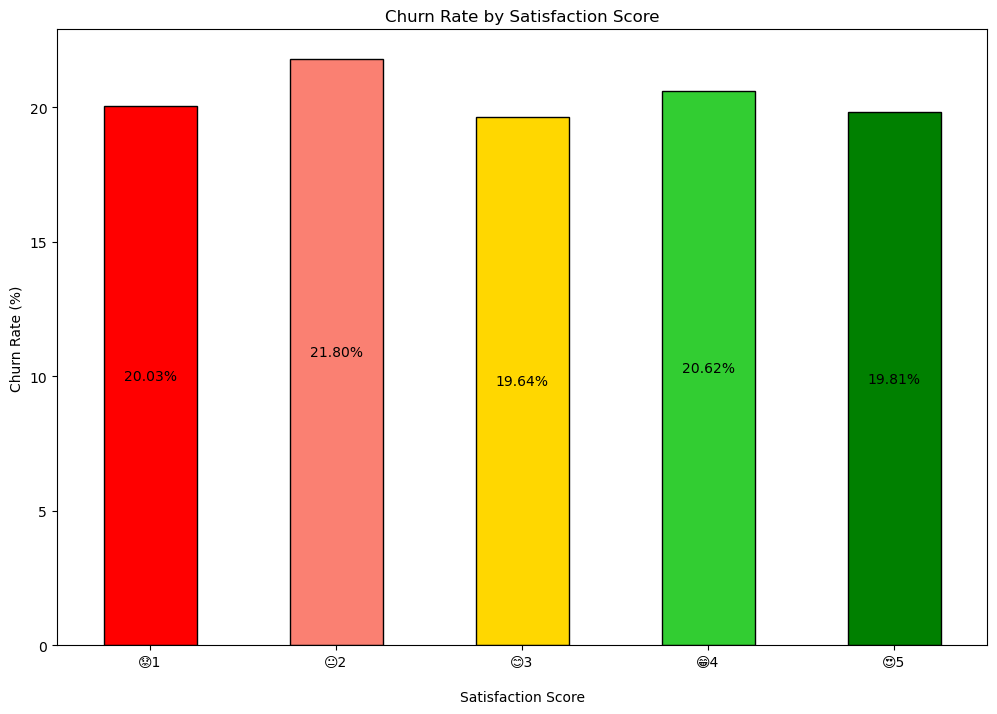

In [25]:
# Calculate the proportion of churned and non-churned customers for Satisfaction Score
exit_by_Satisfaction_Score = df.groupby(['Satisfaction Score', 'Exited']).size().unstack(fill_value=0)
exit_by_Satisfaction_Score['Total'] = exit_by_Satisfaction_Score.sum(axis=1)
exit_by_Satisfaction_Score['Churn Rate (%)'] = (exit_by_Satisfaction_Score[1] / exit_by_Satisfaction_Score['Total']) * 100

# Define colors for different Satisfaction Scores
colors = ['red', 'salmon', 'gold', 'limegreen', 'green']

# Define the emoji labels for Satisfaction Scores
emoji_labels = {
    1: '😟1',  # Very dissatisfied
    2: '😐2',  # Neutral
    3: '😊3',  # Satisfied
    4: '😁4',  # Very satisfied
    5: '😍5'   # Extremely satisfied
}

# Replace numerical labels with emojis
exit_by_Satisfaction_Score.index = exit_by_Satisfaction_Score.index.map(emoji_labels)

# Plot the stacked bar chart showing percentages
plt.figure(figsize=(12, 8))
bars = exit_by_Satisfaction_Score['Churn Rate (%)'].plot(kind='bar', color=colors[:len(exit_by_Satisfaction_Score)], edgecolor='black')
plt.title('Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score', labelpad=15)
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)


for i, value in enumerate(exit_by_Satisfaction_Score['Churn Rate (%)']):
    plt.text(i, value/2, f'{value:.2f}%', ha='center', va='center')

plt.show()


<H2>Churn Rate By Active Member

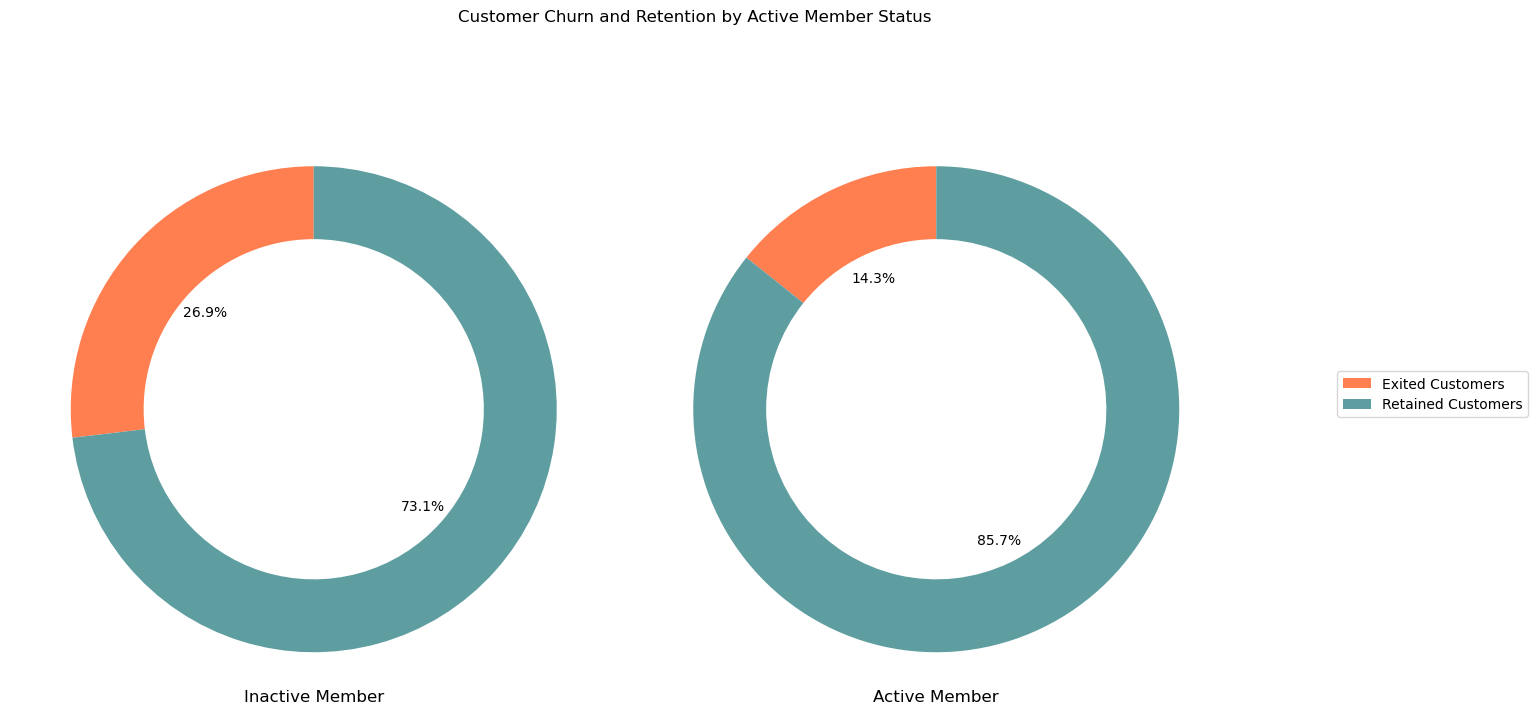

In [26]:
# Calculate the total number of customers for each IsActiveMember status
total_customers_by_active_member = df['IsActiveMember'].value_counts()

# Calculate the number of exited customers for each IsActiveMember status
exited_customers_by_active_member = df[df['Exited'] == 1]['IsActiveMember'].value_counts()

# Create a DataFrame
churn_data = pd.DataFrame({
    'Total Customers': total_customers_by_active_member,
    'Exited Customers': exited_customers_by_active_member
}).fillna(0)

# Calculate the number of retained customers
churn_data['Retained Customers'] = churn_data['Total Customers'] - churn_data['Exited Customers']

# Ensure the index has correct string labels
churn_data.index = churn_data.index.map({1: 'Active Member', 0: 'Inactive Member'})

# Plot the donut charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

colors = ["coral", "cadetblue"]

for i, (status, row) in enumerate(churn_data.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        [row['Exited Customers'], row['Retained Customers']],
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3)
    )
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    
    # Add status label below the plot
    ax.text(0, -1.2, status, ha='center', fontsize=12, color='black')

# Hide the original titles
for ax in axes:
    ax.set_title('')

# Add legend
fig.legend(wedges, ['Exited Customers', 'Retained Customers'], loc='center right', bbox_to_anchor=(1.1, 0.5))

# Add an overarching title
plt.suptitle('Customer Churn and Retention by Active Member Status', y=1.05)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


<H2>Churn Rate By Has Credit Card Or Not

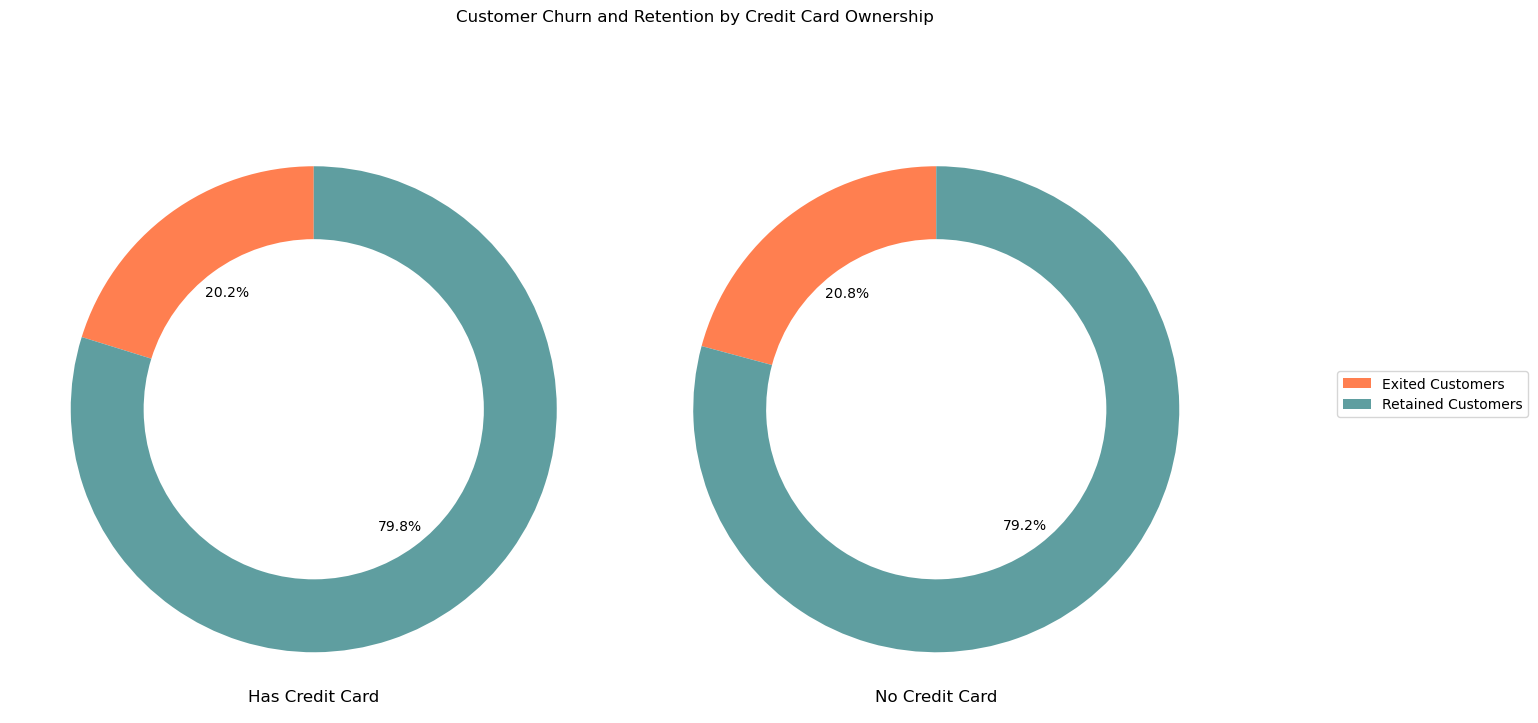

In [27]:

# Calculate the total number of customers for each HasCrCard status
total_customers_by_crcard = df['HasCrCard'].value_counts()

# Calculate the number of exited customers for each HasCrCard status
exited_customers_by_crcard = df[df['Exited'] == 1]['HasCrCard'].value_counts()

# Create a DataFrame
churn_data = pd.DataFrame({
    'Total Customers': total_customers_by_crcard,
    'Exited Customers': exited_customers_by_crcard
}).fillna(0)

# Calculate the number of retained customers
churn_data['Retained Customers'] = churn_data['Total Customers'] - churn_data['Exited Customers']

# Ensure the index has correct string labels
churn_data.index = churn_data.index.map({1: 'Has Credit Card', 0: 'No Credit Card'})

# Plot the donut charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

colors = ["coral", "cadetblue"]

for i, (status, row) in enumerate(churn_data.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        [row['Exited Customers'], row['Retained Customers']],
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3)
    )
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    
    # Add status label below the plot
    ax.text(0, -1.2, status, ha='center', fontsize=12, color='black')

# Hide the original titles
for ax in axes:
    ax.set_title('')

# Add legend
fig.legend(wedges, ['Exited Customers', 'Retained Customers'], loc='center right', bbox_to_anchor=(1.1, 0.5))

# Add an overarching title
plt.suptitle('Customer Churn and Retention by Credit Card Ownership', y=1.05)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


<H2>Churn Rate By Num of Products

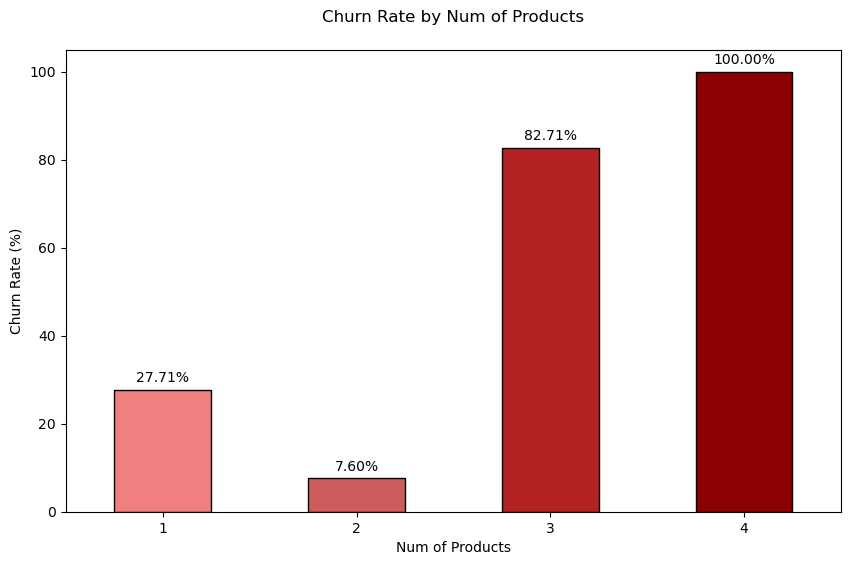

In [28]:
# Calculate the proportion of churned and non-churned customers for each NumOfProducts
exit_by_NumOfProducts = df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)
exit_by_NumOfProducts['Total'] = exit_by_NumOfProducts.sum(axis=1)
exit_by_NumOfProducts['Churn Rate (%)'] = (exit_by_NumOfProducts[1] / exit_by_NumOfProducts['Total']) * 100

# Choose colors for different NumOfProducts
colors = ['lightcoral','indianred','firebrick','darkred']

# Plot the stacked bar chart showing percentages
plt.figure(figsize=(10, 6))
bars = exit_by_NumOfProducts['Churn Rate (%)'].plot(kind='bar', color=colors[:len(exit_by_NumOfProducts)], edgecolor='black')
plt.title('Churn Rate by Num of Products', pad=20)
plt.xlabel('Num of Products')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)


# Display percentage labels
for i, value in enumerate(exit_by_NumOfProducts['Churn Rate (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


In [29]:
df['NumOfProducts'].value_counts().sort_index()


1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<H2>Churn Rate By Point Earned

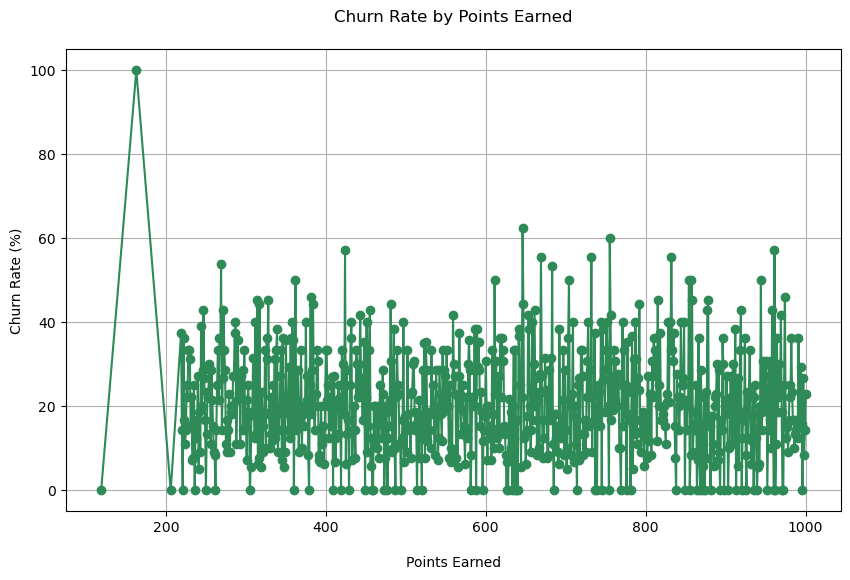

In [30]:
# Calculate the proportion of churned and non-churned customers for Point Earned
exit_by_points = df.groupby('Point Earned')['Exited'].mean() * 100

# plotting a line chart
plt.figure(figsize=(10, 6))
exit_by_points.plot(marker='o', color='seagreen', linestyle='-')
plt.title('Churn Rate by Points Earned', pad=20)
plt.xlabel('Points Earned', labelpad=15)
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()



<H2>Churn Rate By Estimated Salary

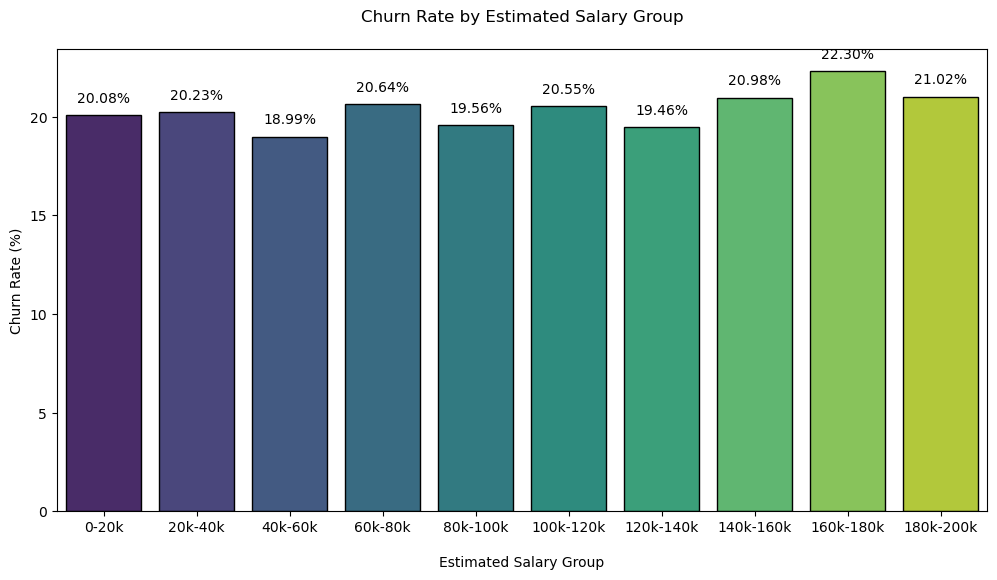

In [31]:
# Define salary bins and labels
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k']

# Create salary groups based on the bins
df['Salary_Group'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=labels, right=False)

# Calculate churn rate for each salary group
churn_by_salary = df.groupby('Salary_Group')['Exited'].mean() * 100

# Plot the churn rate by salary group
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=churn_by_salary.index, y=churn_by_salary.values, palette="viridis", edgecolor='black')
plt.title('Churn Rate by Estimated Salary Group', pad =20)
plt.xlabel('Estimated Salary Group', labelpad=15)
plt.ylabel('Churn Rate (%)')

# Display percentage labels on the bars
for i, value in enumerate(churn_by_salary.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


In [32]:
df['Salary_Group'].value_counts().sort_index()


0-20k         986
20k-40k       969
40k-60k      1006
60k-80k      1027
80k-100k     1002
100k-120k    1027
120k-140k    1007
140k-160k     982
160k-180k    1009
180k-200k     985
Name: Salary_Group, dtype: int64

<H2>Churn Rate By Balance

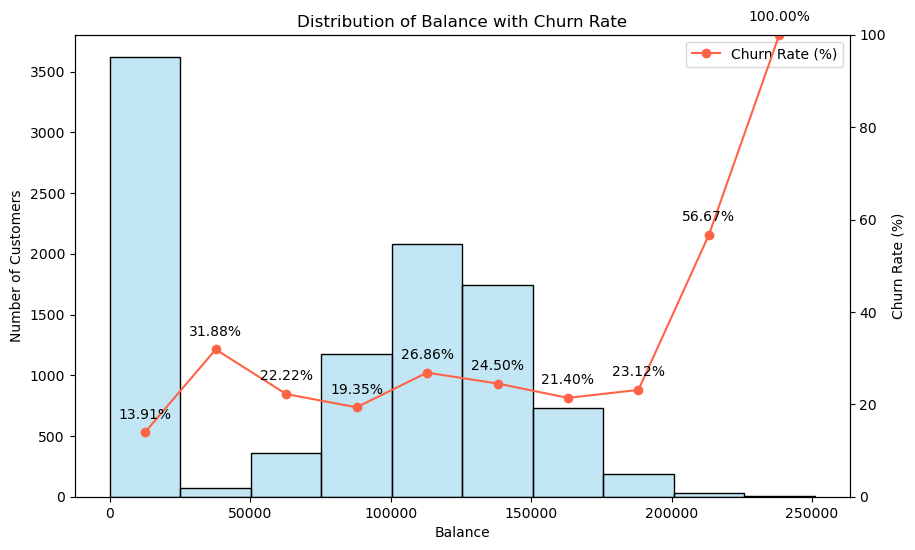

In [33]:
# Create balance bins
balance_bins = pd.cut(df['Balance'], bins=10)

# Calculate churn rate for each balance bin
churn_by_balance = df.groupby(balance_bins)['Exited'].mean() * 100
balance_bin_centers = [bin.mid for bin in churn_by_balance.index]

# Plot the distribution of Balance
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Balance'], bins=10, kde=False, color='skyblue', alpha=0.5)

# Plot the churn rate line
ax2 = ax.twinx()
ax2.plot(balance_bin_centers, churn_by_balance.values, marker='o', color='tomato', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)')
ax2.set_ylim(0, 100)  # Set the y-axis limit for churn rate to 0-100%

# Annotate churn rate values on the plot
for i, txt in enumerate(churn_by_balance.values):
    ax2.annotate(f'{txt:.2f}%', (balance_bin_centers[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Set title and axis labels
plt.title('Distribution of Balance with Churn Rate')
ax.set_xlabel('Balance')
ax.set_ylabel('Number of Customers')

# Show legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()


In [34]:
# 设置bin的大小
bin_size = 25000

# 创建bins
bins = np.arange(0, df['Balance'].max() + bin_size, bin_size)

# 分组并计算每个bin的计数
df['bins'] = pd.cut(df['Balance'], bins=bins)
bin_counts = df['bins'].value_counts().sort_index()
# 打印结果
print(bin_counts)

(0.0, 25000.0]             6
(25000.0, 50000.0]        69
(50000.0, 75000.0]       349
(75000.0, 100000.0]     1160
(100000.0, 125000.0]    2068
(125000.0, 150000.0]    1762
(150000.0, 175000.0]     738
(175000.0, 200000.0]     197
(200000.0, 225000.0]      32
(225000.0, 250000.0]       1
(250000.0, 275000.0]       1
Name: bins, dtype: int64


In [ ]:
# Selecting variables to analyze
selected_vars = ['CreditScore','Age', 'NumOfProducts', 'Balance','EstimatedSalary','Exited']

# Creating pairplot with selected variables
sns.pairplot(data=df[selected_vars], hue='Exited')
plt.show()


<H1>Executive Summary

<div style="background-color: pink; padding: 10px">Our analysis reveals key insights into the churn rate among our customer base. Overall, the churn rate stands at 20.38%, with notable differences across various demographics and customer segments. This report aims to highlight the critical areas contributing to customer churn and provide actionable recommendations for improving customer retention.</div>

<H1>Key Findings

<div style="background-color: pink; padding: 10px">

****1. Demographic Insights:****<br>  
    ➤ Gender: The churn rate is significantly higher among females compared to males.<br>
    ➤ Age: Our customer base is predominantly aged 25-45. However, the highest churn rates are observed in the 45-65 age group, suggesting our products may not appeal to the late middle-aged demographic or that competitors offer more attractive alternatives.<br>
<br>    
</div>

<div style="background-color: pink; padding: 10px">

****2. Geographic Insights:****<br>  
    ➤ Our customers are primarily from France. However, the churn rate among German customers is notably higher, particularly in the 50-60 age group. This disparity suggests potential service issues in Germany that need addressing.<br>
<br>    
</div>

<div style="background-color: pink; padding: 10px">

****3. Customer Tenure:****<br>  
    ➤ The churn rate within the first month is slightly higher, indicating that some new customers may be "customer bonus seekers." This trend, although not pronounced, warrants strategies to improve early customer retention. <br>
<br>    
</div>

<div style="background-color: pink; padding: 10px">

****4. Customer Complaints:****<br>  
    ➤ An alarming 99.5% of customers who filed complaints eventually left our bank. This indicates a severe issue with how complaints are managed and resolved, necessitating an overhaul of our customer service approach to provide satisfactory solutions<br>
<br>    
</div>

<div style="background-color: pink; padding: 10px">

****5. Credit Card and Product Analysis:****<br>  
    ➤ There is no clear trend regarding credit card ownership or card type and customer retention. However, active members are more likely to stay than inactive members.<br>
    ➤ Customers with 3-4 products exhibit a high churn rate, particularly those with 4 products, who have a 100% churn rate. This suggests that these customers may be exploiting our offerings to meet bonus criteria and subsequently leaving.<br>
    ➤ Customers with fewer than 200 reward points tend to leave, indicating they may not perceive sufficient benefits from our bank.<br>
<br>    
</div>

<div style="background-color: pink; padding: 10px">

****6. High Balance Customers:****<br>  
    ➤ Customers with balances exceeding 200,000 have a high churn rate. This suggests that other banks may be offering more attractive incentives to high-balance customers.<br>
<br>    
</div>

<H1>Recommendations

<div style="background-color: pink; padding: 10px">

****1. Improve Customer Retention Strategies:****<br>  
    ➤ Develop targeted strategies to retain female customers and address the needs of the 45-65 age group. <br>
➤ Investigate and address service issues in Germany to reduce churn in this region.<br> 
</div>

<div style="background-color: pink; padding: 10px">

****2. Enhance Early Customer Experience:****<br>  
    ➤ Implement onboarding programs to engage new customers and reduce the churn rate within the first month.<br>
 
</div>

<div style="background-color: pink; padding: 10px">

****3. Revamp Customer Service:****<br>  
    ➤ Strengthen the customer service team's capabilities to handle complaints effectively, ensuring satisfactory resolutions to retain dissatisfied customers.<br> 
</div>

<div style="background-color: pink; padding: 10px">

****4. Optimize Product Offerings:****<br>  
    ➤ Evaluate and refine product offerings to ensure they meet the needs and expectations of customers with multiple products.<br> 
    ➤ Consider loyalty programs or additional incentives for customers with fewer reward points to enhance their perceived value.
</div>

<div style="background-color: pink; padding: 10px">

****5. Attract and Retain High-Balance Customers:****<br>  
    ➤Develop competitive bonus programs and personalized services to retain high-balance customers who may be tempted by other banks.<br> 
</div>

<H1>Conclusion

<div style="background-color: pink; padding: 10px">
This analysis underscores the importance of understanding the factors driving customer churn and implementing targeted strategies to mitigate these issues. By focusing on customer satisfaction, service quality, and tailored product offerings, we can enhance customer loyalty and reduce churn.
<br>  

</div>